In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
path ="/Users/meijiaojiao/Desktop/Evolution_algorithm/Final/Lamarck/Lamarck_rawdata.csv"
lamarck = pd.read_csv(path, header=0, index_col=[0,1])
print(lamarck)

path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Final/SSGA/SSGA_rawdata.csv"
SSGA = pd.read_csv(path,header=0,index_col=[0,1])
print(SSGA.shape)

path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Final/Baldwin/Baldwin_rawdata.csv"
baldwin = pd.read_csv(path,header=0,index_col=[0,1])
print(baldwin.shape)

df_together = pd.concat([lamarck,SSGA,baldwin],axis=0,keys=["Lamarck","SSGA","Baldwin"])
print(df_together.shape)
print(df_together)

                   590        593        579        588        589        591  \
F1  Times1    0.002860   0.002471   0.001030   0.002377   0.002108   0.001700   
    Times2    0.001824   0.001727   0.001236   0.003462   0.003075   0.002476   
    Times3    0.002365   0.002970   0.001647   0.002308   0.002058   0.002677   
    Times4    0.002543   0.001552   0.001222   0.001627   0.003379   0.001500   
    Times5    0.001582   0.003094   0.001051   0.002270   0.002220   0.001603   
...                ...        ...        ...        ...        ...        ...   
F23 Times6   -5.128481 -10.536275 -10.536204 -10.536211  -5.175647 -10.536320   
    Times7  -10.536327 -10.536247 -10.536257 -10.536290 -10.536232 -10.536286   
    Times8  -10.536338 -10.536284  -5.175647 -10.536248 -10.536310 -10.536342   
    Times9  -10.536332 -10.536272 -10.536271 -10.536216 -10.536355 -10.536374   
    Times10 -10.536385 -10.536224 -10.536212 -10.536300 -10.536269 -10.536327   

                   576     

Lamarck  F1   Times1   590     0.002860
                       593     0.002471
                       579     0.001030
                       588     0.002377
                       589     0.002108
                                ...    
Baldwin  F23  Times10  562    -5.175647
                       575   -10.536355
                       573    -7.369716
                       552    -5.175647
                       555   -10.536222
Length: 11500, dtype: float64

,Function,Combinations,Mode,Times,Solutions
0,F1,590,Lamarck,Times1,0.002860
1,F1,593,Lamarck,Times1,0.002471
2,F1,579,Lamarck,Times1,0.001030
3,F1,588,Lamarck,Times1,0.002377
4,F1,589,Lamarck,Times1,0.002108
...,...,...,...,...,...
11495,F23,562,Baldwin,Times10,-5.175647
11496,F23,575,Baldwin,Times10,-10.536355
11497,F23,573,Baldwin,Times10,-7.369716
11498,F23,552,Baldwin,Times10,-5.175647


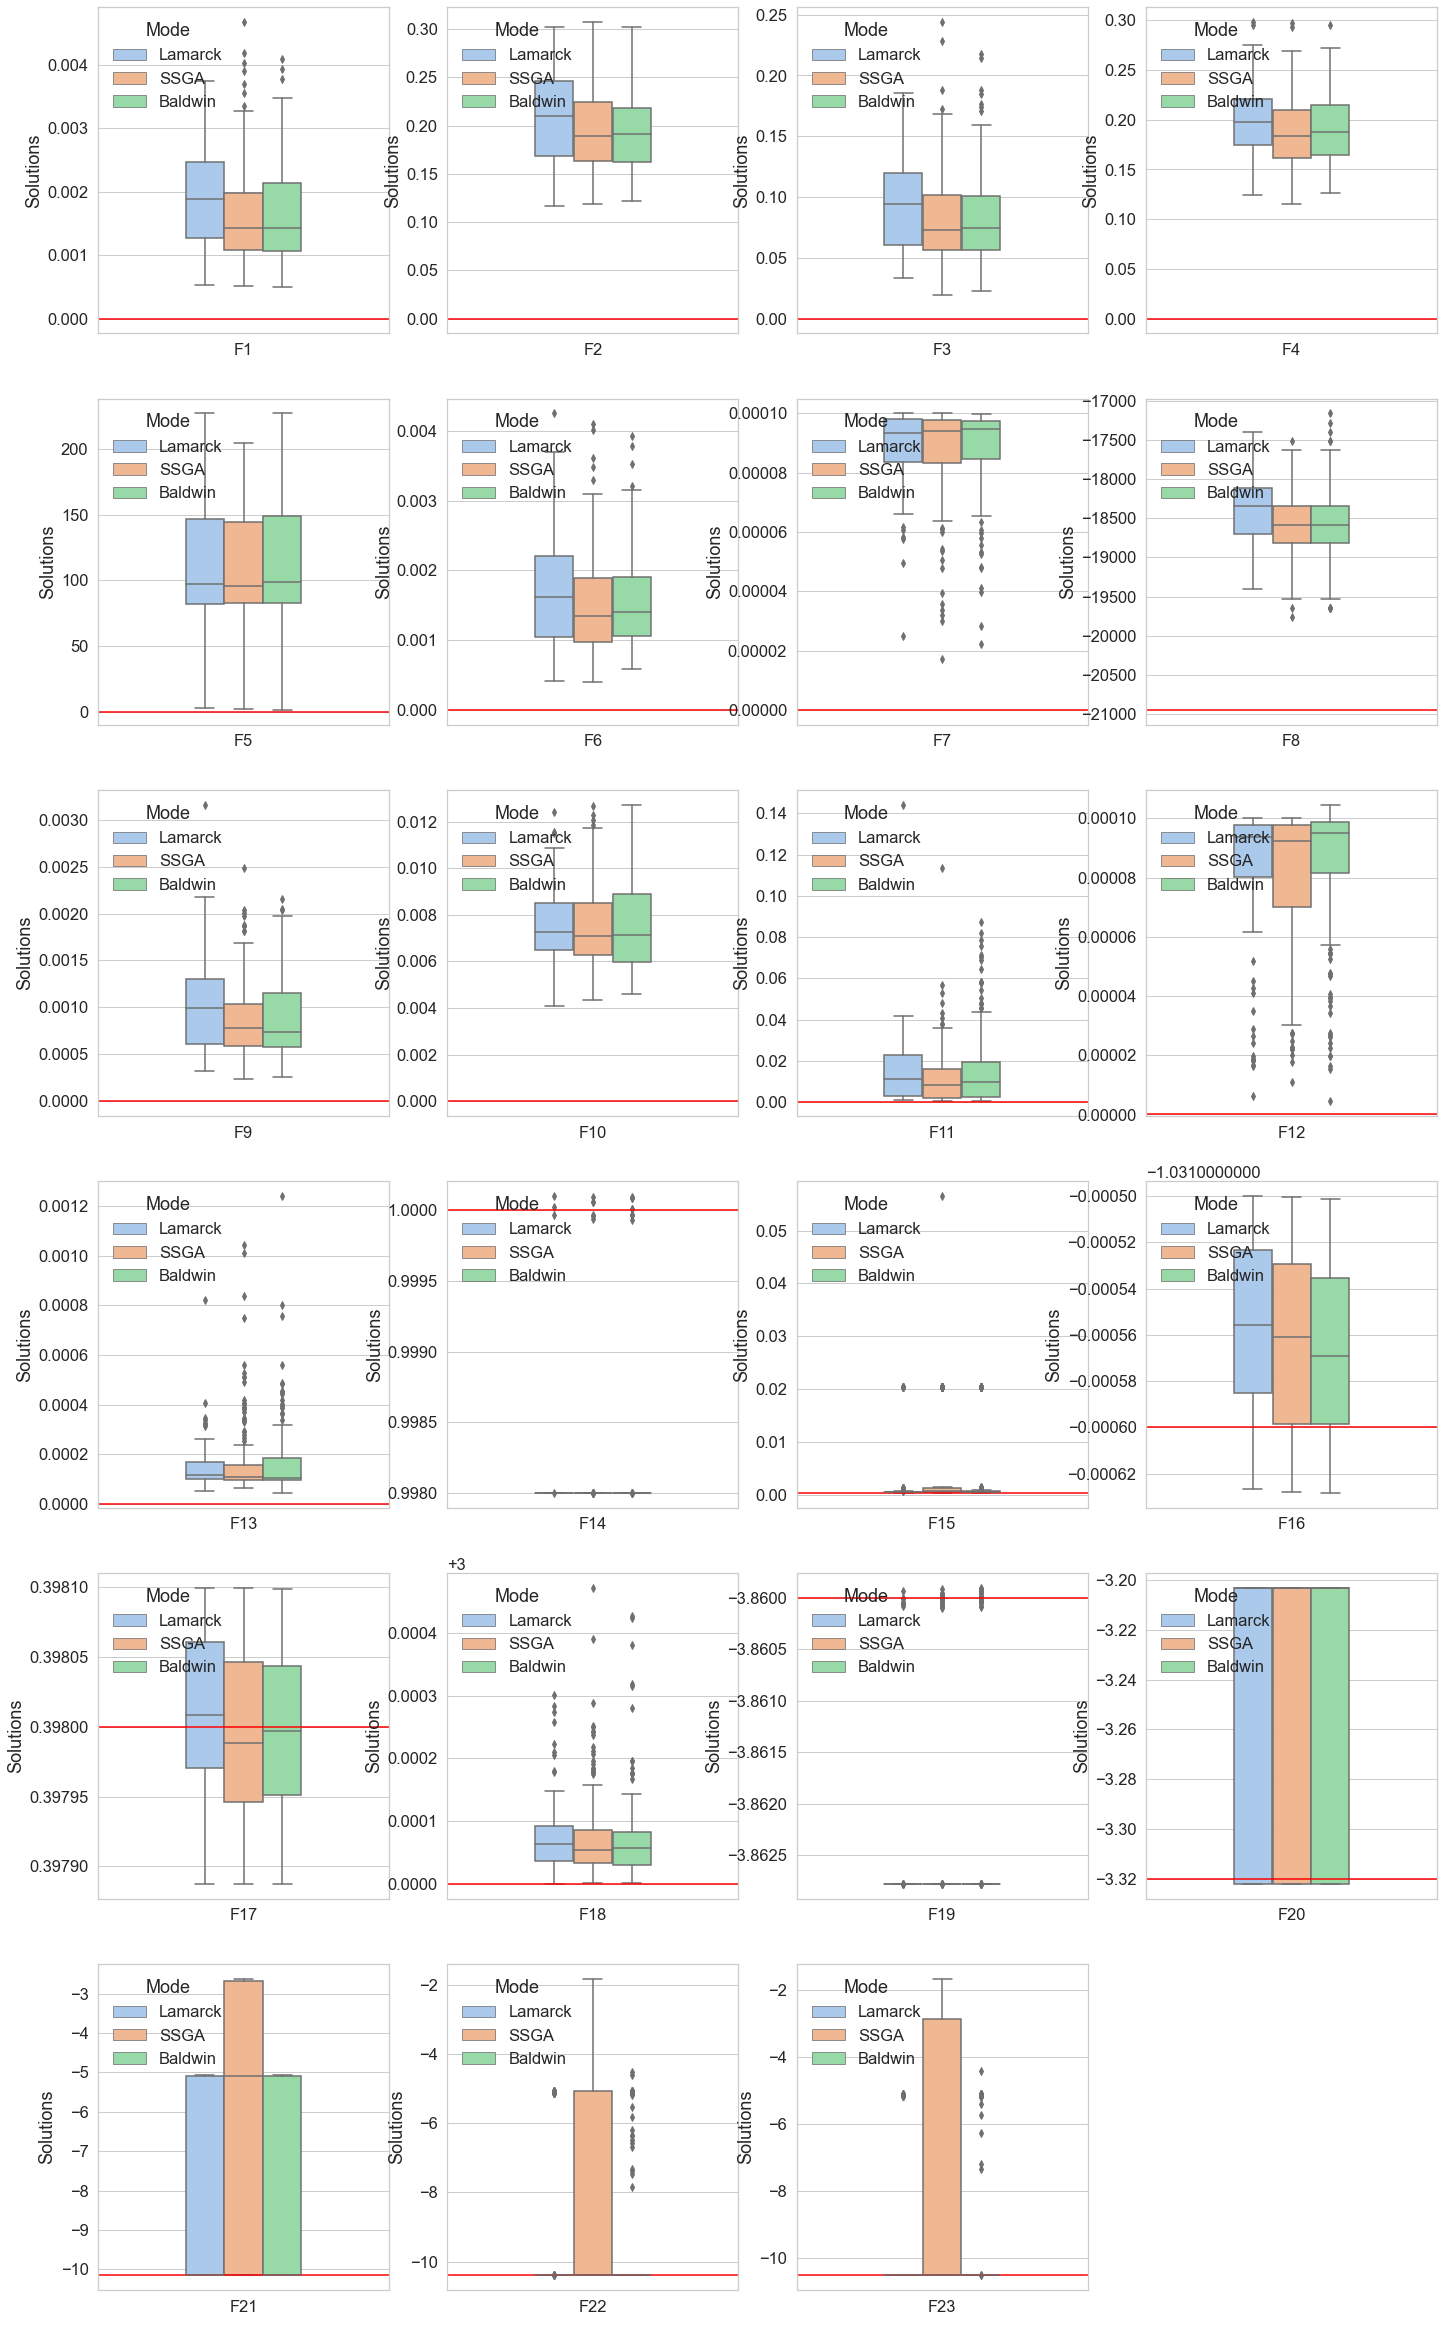

In [9]:
import seaborn as sns
dataframe = df_together
dataframe = dataframe.stack()
display(dataframe)
dataframe = dataframe.rename_axis(index=["Mode","Function","Times","Combinations"])
dataframe = dataframe.reset_index(level=[0, 2], name="Solutions")
dataframe["Solutions"] = dataframe["Solutions"].replace("NAN", 0)
dataframe["Solutions"] = pd.to_numeric(dataframe["Solutions"])
dataframe = dataframe.reset_index(drop=False)
display(dataframe)
# function_list = ["F" + str(i) for i in [13,15,18,20,21,22,23]]
function_list = ["F" + str(i) for i in range(1,24,1)]
opt = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -418.98 * 50, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0003, -1.0316, 0.398, 3.0,
       -3.86, -3.32, -10.1532,-10.4028, -10.5363]
# opt = [0,0.0003,3,-3.32,-10.1532, -10.4028, -10.5363]
def show_graph(dataframe):
    sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
    dist_cols = 4
    dist_rows = 6
    plt.figure(figsize=(6 * dist_cols, 7 * dist_rows))
    i = 1
    for function in function_list:
        dataf = dataframe[dataframe["Function"] == function]
        plt.subplot(dist_rows, dist_cols, i)
        # ax = sns.violinplot(data=dataf, y="Solutions",x="Function",hue="Mode",inner="points")
        ax = sns.boxplot(data=dataf, y="Solutions",x="Function",hue="Mode",width=0.4)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(0,1), frameon=False)
        plt.axhline(y=opt[i-1],color="red")
        plt.xlabel(" ")
        plt.ylabel("Solutions")
        i = i + 1
    plt.savefig("./violin_plots_3.png", dpi=1200, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)